In [1]:
%matplotlib inline
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import sklearn
from sklearn.tree import DecisionTreeClassifier as DecisionTree
from sklearn.tree import export_graphviz
import pydotplus
import io
from scipy import misc
import imageio
import time
import matplotlib.image as mpimg

In [2]:
# importando nosso dataset;
zoo = pd.read_csv(".\Data\zoo.csv")     
# características dos animais para o teste;
inputs = zoo.drop(columns=["class_type","animal_name"])
# resultado esperado;
target = zoo["class_type"]

In [3]:
@interact(k = (1,len(inputs.columns), 1))
def f(k=5):
    model = DecisionTree(max_depth=k)
    model.fit(inputs,target);
    model.score(inputs,target);
    acertos=0
    for i in range(len(zoo)):
        if (model.predict([inputs.iloc[i]])[0])==(zoo.iloc[i]['class_type']):
            acertos+=1
        else:
            print('Error',zoo.iloc[i]['animal_name'])
    print()
    print('Numero de acertos:',acertos)
    print("Número de erros: ",(len(zoo)-acertos))
    print('Porcentagem de acertos: {:.2f}%'.format(acertos/len(zoo)*100) )
    plt.pie([acertos,len(zoo)-acertos], explode=[1,-.95], labels=[None,'Erros'], 
            colors=["#98FB98","#0B6623"]);
    def showtree (tree,features,path):
        file = io.StringIO()
        export_graphviz(tree, out_file=file, feature_names=features)
        pydotplus.graph_from_dot_data(file.getvalue()).write_png(path)
        img = imageio.imread(path)
    showtree(DecisionTree(max_depth=k).fit(inputs,target), list(inputs.columns), './Img/tree.png');        
#plt.imshow(mpimg.imread("./Img/tree.png"));

interactive(children=(IntSlider(value=5, description='k', max=16, min=1), Output()), _dom_classes=('widget-int…

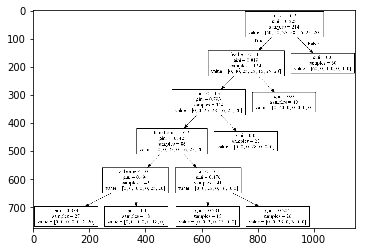

In [4]:
plt.imshow(mpimg.imread("./Img/tree.png"));
#perguntar como linkar com a celula anterior (update instantaneo)
#perguntar como ampliar

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
[114, 86, 61, 36, 12, 11, 6, 4, 3, 3, 3, 3, 3, 3, 3]


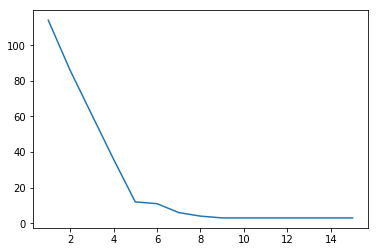

In [5]:
lista_k=[]
lista_erros=[]
for k in range (1,len(inputs.columns)):
    acertos=0
    model = DecisionTree(max_depth=k)
    model.fit(inputs,target);
    model.score(inputs,target);
    for i in range(len(zoo)):
        if (model.predict([inputs.iloc[i]])[0])==(zoo.iloc[i]['class_type']):
            acertos+=1
    erros=len(zoo)-acertos
    lista_k.append(k)
    lista_erros.append(erros)
print(lista_k)
print(lista_erros)
plt.plot(lista_k,lista_erros)